# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Install MMOCR from source
- Perform inference with
  - a pretrained text recognizer
  - a pretrained text detector
  - pretrained recognizer and detector
  - pretrained Key Information Extraction (KIE) model
- Evaluate a text detection model on an acadmic dataset
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR from source

Installing MMOCR is straightforward. We recommend users to install MMOCR from source as any local code changes on MMOCR can take effect immediately, which is needed for research & developement purpose. Refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/get_started/install.html) for more information.

### Install Dependencies using MIM

In [ ]:
# !pip install -U openmim
# !mim install mmengine
# !mim install 'mmcv>=2.0.0rc1'
# !mim install 'mmdet>=3.0.0rc0'

### Install MMOCR

In [ ]:
# !git clone https://github.com/open-mmlab/mmocr.git
# %cd mmocr
# !pip install -v -e .
# # "-v" increases pip's verbosity.
# # "-e" means installing the project in editable mode,
# # That is, any local modifications on the code will take effect immediately.

## Inference

MMOCR has made inference easy by providing a variety of `Inferencer`s. In this section, we will focus on the usage of `MMOCRInferencer`. However, if you want to learn more about other `Inferencer`s, you can refer to the [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html) which provides detailed descriptions.

### Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a demo text recognition image with a pretrained text recognizer. SVTR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#svtr). But you don't need to download it manually -- Our Inferencer script handles these cumbersome setup steps for you! 

Run the following command and you will get the inference result from return value as well as files, which will be  visualized in the end.

/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth
07/09 14:26:19 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


[{'rec_texts': ['wod'], 'rec_scores': [0.2791407306989034]}]


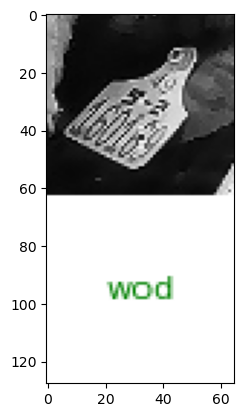

Output()

[{'rec_texts': ['is'], 'rec_scores': [0.7038055658340454]}]


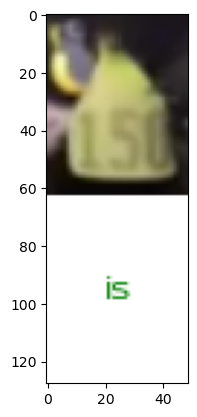

Output()

[{'rec_texts': ['2440'], 'rec_scores': [0.7141784355044365]}]


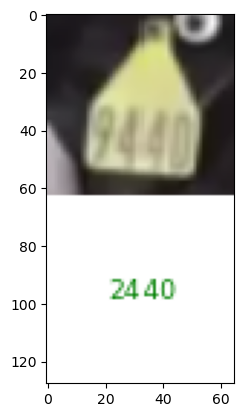

Output()

[{'rec_texts': ['<UKN>'], 'rec_scores': [0.7404953241348267]}]


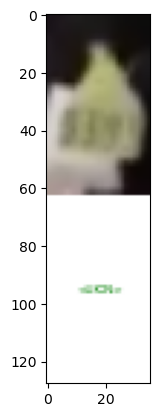

Output()

[{'rec_texts': ['<UKN>2241'], 'rec_scores': [0.8040375590324402]}]


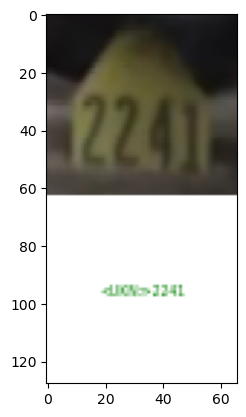

Output()

[{'rec_texts': ['a'], 'rec_scores': [0.25221869349479675]}]


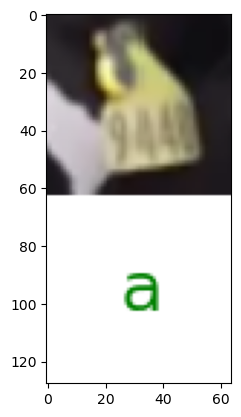

Output()

[{'rec_texts': ['9428'], 'rec_scores': [0.6026838757097721]}]


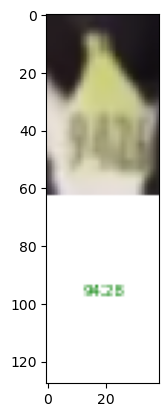

Output()

[{'rec_texts': ['j358'], 'rec_scores': [0.7926212176680565]}]


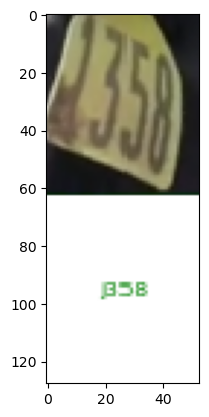

Output()

[{'rec_texts': ['9253'], 'rec_scores': [0.9999411255121231]}]


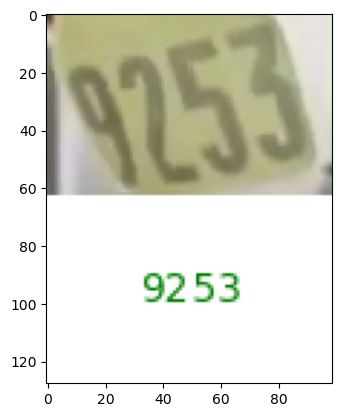

Output()

[{'rec_texts': ['2249'], 'rec_scores': [0.9986430257558823]}]


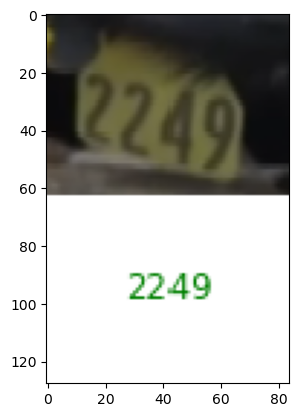

Output()

[{'rec_texts': ['5242'], 'rec_scores': [0.9991145879030228]}]


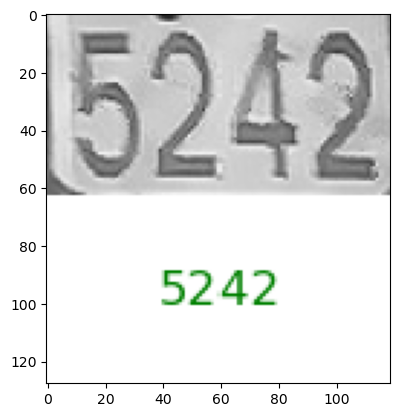

Output()

[{'rec_texts': ['g05<UKN>59'], 'rec_scores': [0.5021618356307348]}]


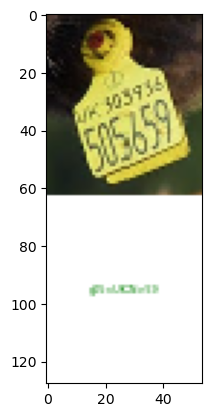

Output()

[{'rec_texts': ['a'], 'rec_scores': [0.5146380066871643]}]


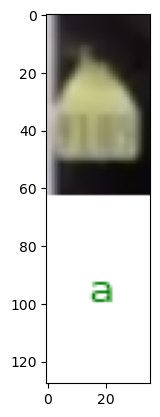

Output()

[{'rec_texts': ['150'], 'rec_scores': [0.9779634873072306]}]


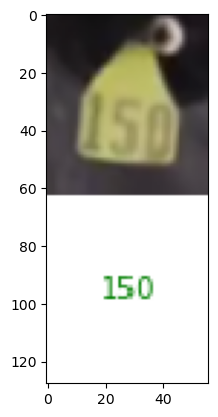

Output()

[{'rec_texts': ['as'], 'rec_scores': [0.2406516596674919]}]


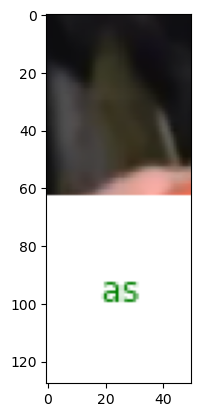

Output()

[{'rec_texts': ['6239'], 'rec_scores': [0.3980366289615631]}]


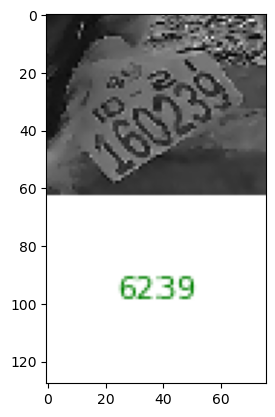

Output()

[{'rec_texts': ['224<UKN>'], 'rec_scores': [0.9180444926023483]}]


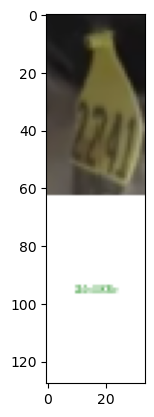

Output()

[{'rec_texts': ['160169'], 'rec_scores': [0.9996224045753479]}]


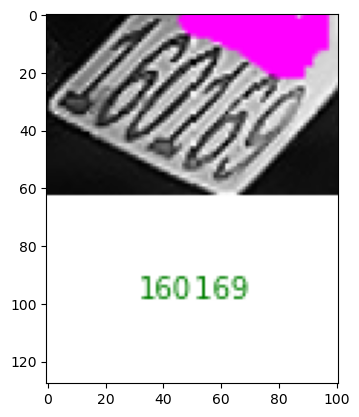

In [1]:
import os
from mmocr.apis import MMOCRInferencer

infer = MMOCRInferencer(rec='svtr-small')

DEMO_RECOG_IMG_DIR = 'data/HF_dataset/samples/ear-tags/recognition'
for test_img_path in os.listdir(DEMO_RECOG_IMG_DIR):
    result = infer(os.path.join(DEMO_RECOG_IMG_DIR, test_img_path), return_vis=True)
    import matplotlib.pyplot as plt
    print(result['predictions'])
    plt.imshow(result['visualization'][0])
    plt.show()

### Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained DBNet++ text detector and visualize the bounding box results for the demo text detection image.

Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


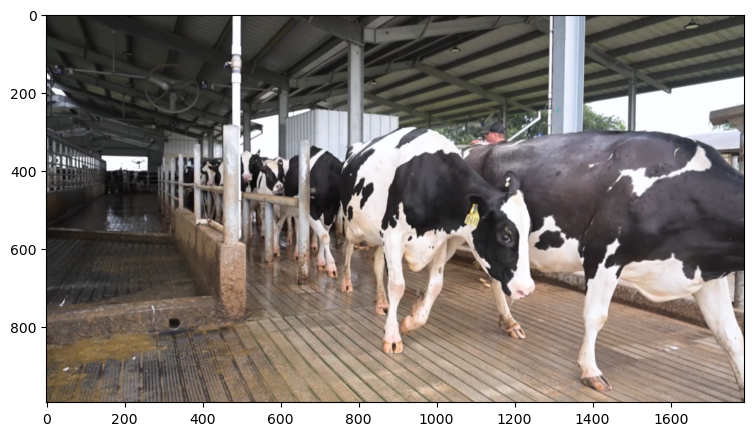

Output()

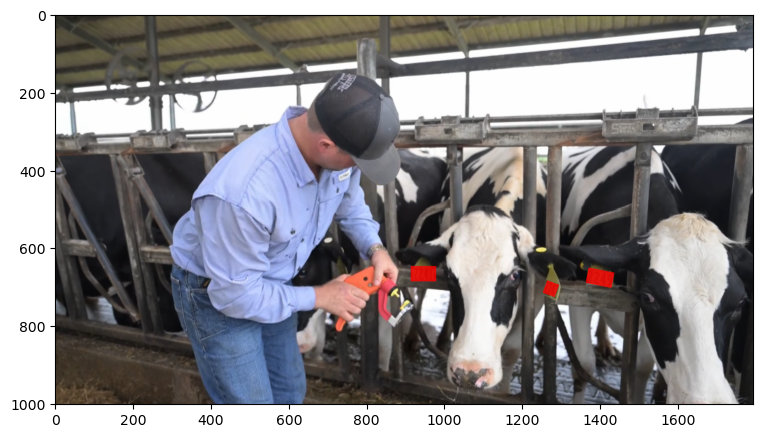

Output()

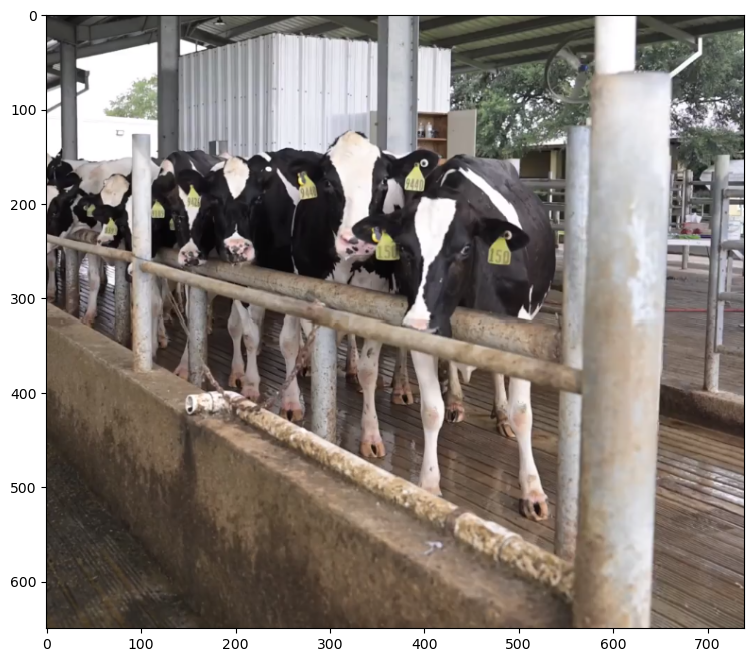

In [4]:
from mmocr.apis import MMOCRInferencer
from mmocr.apis import MMOCRInferencer
import os

infer = MMOCRInferencer(det='dbnetpp')

DEMO_DET_IMG_DIR = 'data/HF_dataset/samples/ear-tags/detection'
for test_img_path in os.listdir(DEMO_DET_IMG_DIR):
    result = infer(os.path.join(DEMO_DET_IMG_DIR, test_img_path), return_vis=True)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9, 16))
    plt.imshow(result['visualization'][0])
    plt.show()

### Perform end-to-end OCR with pretrained recognizer and detector

We can  any text detector and recognizer into a pipeline that forms a standard OCR pipeline. Now we build our own OCR pipeline with DBNet++ and SVTR and apply it to `demo/demo_text_ocr.jpg`.

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Output()

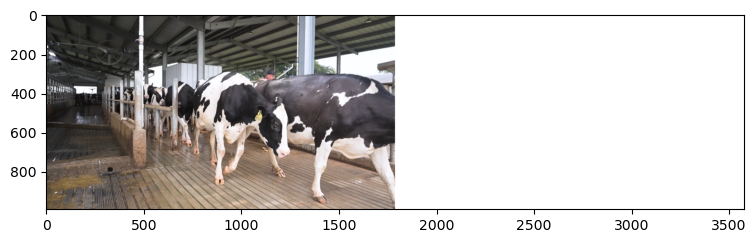

Output()

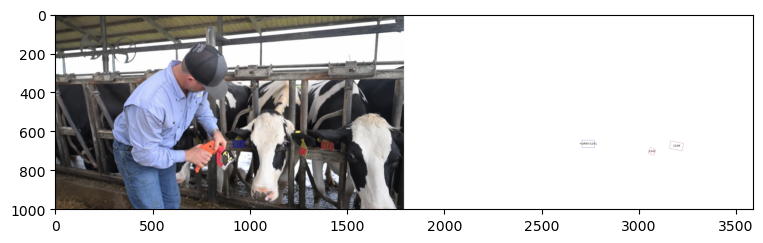

Output()

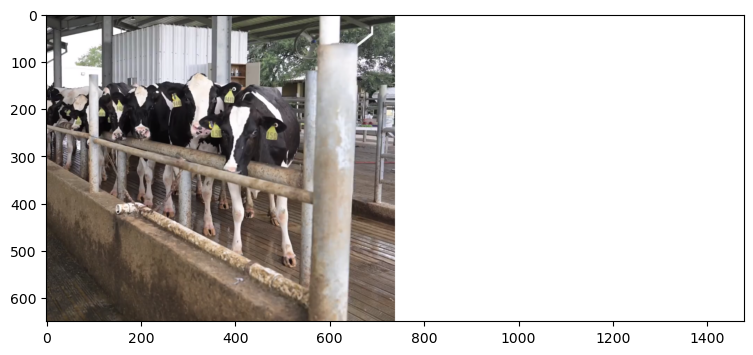

In [6]:
from mmocr.apis import MMOCRInferencer
import os

infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')

# test_img_path = 'demo/demo_text_ocr.jpg'
for test_img_path in os.listdir(DEMO_DET_IMG_DIR):
    result = infer(os.path.join(DEMO_DET_IMG_DIR, test_img_path), return_vis=True)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9, 16))
    plt.imshow(result['visualization'][0])
    plt.show()

### Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to `demo/demo_kie.jpeg` and visualize its prediction.


In [7]:
# from mmocr.apis import MMOCRInferencer
# infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small', kie='SDMGR')
# result = infer('demo/demo_kie.jpeg', save_vis=True)

In [ ]:
# # Visualize the results
# import mmcv
# import matplotlib.pyplot as plt
# predicted_img = mmcv.imread('results/vis/demo_kie.jpg')
# plt.figure(figsize=(18, 32))
# plt.imshow(mmcv.bgr2rgb(predicted_img))
# plt.show()

## Training SAR on a Toy Dataset

We now demonstrate how to train a recognizer on a provided dataset in a Python interpreter. Another common practice is to train a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#training).

Since training a full academic dataset is time consuming (usually takes about several hours or even days), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a model usually consists of the following steps:
1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should never be a concern if the dataset is obtained from Dataset Preparer. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/recog.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for training. 
3. Train the model. 

In this example, we will use an off-the-shelf toy dataset to train SAR, and the first step will be skipped. The full demonstration of the first step can be found at the next section: Evaluating SAR on academic testsets.

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. The toy dataset consisits of ten images as well as annotation files in both json and lmdb format, and we only use json annotations in this tutorial.

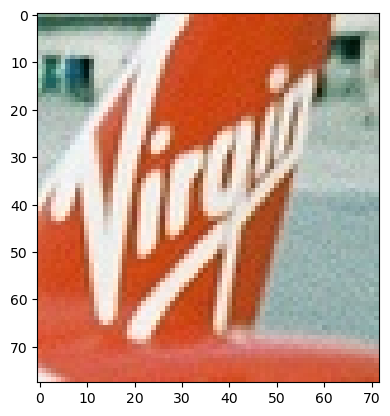

In [1]:
import mmcv
import matplotlib.pyplot as plt 
from pathlib import Path

# MMOCR_ROOT = Path('mmocr_repo') # script next to root
# MMOCR_ROOT = Path('.') # script inside the root
MMOCR_ROOT = Path('../mmocr') # external installation

img = mmcv.imread(MMOCR_ROOT / 'tests/data/rec_toy_dataset/imgs/1058891.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [2]:
# Inspect the labels of the annootation file
!cat {MMOCR_ROOT / 'tests/data/rec_toy_dataset/labels.json'}

{
    "metainfo": {
        "dataset_type": "TextRecogDataset",
        "task_name": "textrecog"
    },
    "data_list": [
        {
            "instances": [
                {
                    "text": "GRAND"
                }
            ],
            "img_path": "1223731.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223733.jpg"
        },
        {
            "instances": [
                {
                    "text": "HOTEL"
                }
            ],
            "img_path": "1223732.jpg"
        },
        {
            "instances": [
                {
                    "text": "PACIFIC"
                }
            ],
            "img_path": "1223729.jpg"
        },
        {
            "instances": [
                {
                    "text": "03/09/2009"
                }
            ],
            "img_path": "1036169.jpg"
        },
     

### Load Config

First we will load the toy config for SAR.


In [2]:
from mmengine.hub import get_config

cfg = get_config(
    'mmocr::textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py')
cfg

/home/bonting/micromamba/envs/bonting-id/lib/python3.11/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Config (path: /home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmocr/.mim/configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py): {'toy_data_root': 'tests/data/rec_toy_dataset/', 'toy_rec_train': {'type': 'OCRDataset', 'data_root': 'tests/data/rec_toy_dataset/', 'data_prefix': {'img_path': 'imgs/'}, 'ann_file': 'labels.json', 'pipeline': None, 'test_mode': False}, 'toy_rec_test': {'type': 'OCRDataset', 'data_root': 'tests/data/rec_toy_dataset/', 'data_prefix': {'img_path': 'imgs/'}, 'ann_file': 'labels.json', 'pipeline': None, 'test_mode': True}, 'default_scope': 'mmocr', 'env_cfg': {'cudnn_benchmark': False, 'mp_cfg': {'mp_start_method': 'fork', 'opencv_num_threads': 0}, 'dist_cfg': {'backend': 'nccl'}}, 'randomness': {'seed': None}, 'default_hooks': {'timer': {'type': 'IterTimerHook'}, 'logger': {'type': 'LoggerHook', 'interval': 1}, 'param_scheduler': {'type': 'ParamSchedulerHook'}, 'checkpoint': {'type': 'CheckpointHook', 'interval': 1}, 'sampler_seed':

In order to train SAR to its best state on toy dataset, we need to modify some hyperparameters in the config to accomodate some of the settings of colab.
For more explanation about the config and its fields, please refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/config.html).

In [3]:
# Specify the work dir
cfg.work_dir = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/'
# Configure the batch size, learning rate, and maximum epochs
cfg.optim_wrapper.optimizer.lr = 1e-3
cfg.train_dataloader.batch_size = 5
cfg.train_cfg.max_epochs = 100
# Save checkpoint every 10 epochs
cfg.default_hooks.checkpoint.interval = 10

# We don't need any learning rate scheduler for a toy dataset
# thus clear parameter scheduler here
cfg.param_scheduler = None

# Set seed thus the results are more reproducible
cfg.randomness = dict(seed=0)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
default_hooks = dict(
    checkpoint=dict(interval=10, type='CheckpointHook'),
    logger=dict(interval=1, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    sync_buffer=dict(type='SyncBuffersHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(
        draw_gt=False,
        draw_pred=False,
        enable=False,
        interval=1,
        show=False,
        type='VisualizationHook'))
default_scope = 'mmocr'
dictionary = dict(
    dict_file=
    '/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmocr/.mim/configs/textrecog/sar/../../../dicts/english_digits_symbols.txt',
    same_start_end=True,
    type='Dictionary',
    with_end=True,
    with_padding=True,
    with_start=True,
    with_unknown=True)
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_le

### Train the SAR Text Recognizer 
Let's train the SAR text recognizer on the toy dataset for 10 epochs. 

In [4]:
%cd ../mmocr

/home/bonting/mmocr


In [5]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.train()

07/09 15:56:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:48:23) [GCC 13.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /opt/cuda
    NVCC: Cuda compilation tools, release 12.9, V12.9.86
    GCC: gcc (GCC) 15.1.1 20250425
    PyTorch: 2.4.1
    PyTorch compiling details: PyTorch built with:
  - GCC 11.4
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2.2-Product Build 20240823 for Intel(R) 64 architecture applications
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_35,code=sm_35;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch

SARNet(
  (data_preprocessor): TextRecogDataPreprocessor()
  (backbone): ResNet31OCR(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_2): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (block2): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (bn2): BatchNorm2d(256, eps=

### Perform inference and Visualize the Predictions

We can test the model through [Infernecer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/inference.html), then print out and visualize its return values. Inferencer can also accepts many more types of inputs, just feel free to play around with it.

Loads checkpoint by local backend from path: work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth


/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.loa

07/09 12:57:12 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.


Output()

/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


result: [{'text': '03/09/2009', 'scores': 0.9974950015544891}]


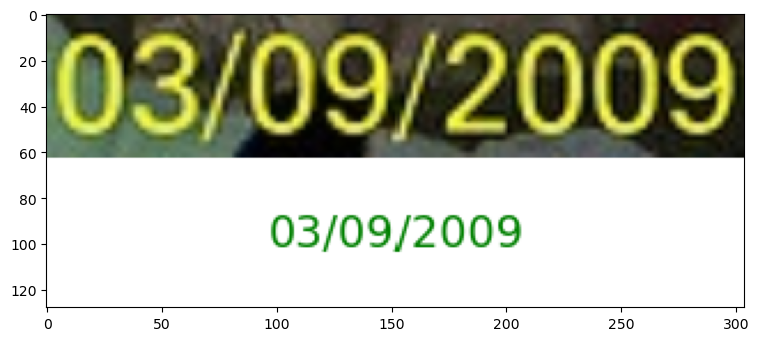

In [6]:
import matplotlib.pyplot as plt
from mmocr.apis import TextRecInferencer

img = 'tests/data/rec_toy_dataset/imgs/1036169.jpg'
checkpoint = "work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth"
cfg_file = "configs/textrecog/sar/sar_resnet31_parallel-decoder_5e_toy.py"

infer = TextRecInferencer(cfg_file, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}' )

plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

### Load Custom Config

First we will load the toy config for SAR.


In [ ]:
!wget wget https://download.openmmlab.com/mmocr/data/icdar2015/mini_icdar2015.tar.gz


In [6]:
from mmengine import Config
from pathlib import Path
# Load the config
cfg = Config.fromfile(
    # MMOCR_ROOT / 'configs/textrecog/sar/custom_sar_resnet31_parallel-decoder_5e_toy.py'
    Path('..') / 'mmocr_configs/textrecog/sar/custom_sar_resnet31_parallel-decoder_5e_toy.py'
)
cfg

Config (path: ../mmocr_configs/textrecog/sar/custom_sar_resnet31_parallel-decoder_5e_toy.py): {'toy_data_root': 'tests/data/rec_toy_dataset/', 'toy_rec_train': {'type': 'OCRDataset', 'data_root': 'tests/data/rec_toy_dataset/', 'data_prefix': {'img_path': 'imgs/'}, 'ann_file': 'labels.json', 'pipeline': None, 'test_mode': False}, 'toy_rec_test': {'type': 'OCRDataset', 'data_root': 'tests/data/rec_toy_dataset/', 'data_prefix': {'img_path': 'imgs/'}, 'ann_file': 'labels.json', 'pipeline': None, 'test_mode': True}, 'default_scope': 'mmocr', 'env_cfg': {'cudnn_benchmark': False, 'mp_cfg': {'mp_start_method': 'fork', 'opencv_num_threads': 0}, 'dist_cfg': {'backend': 'nccl'}}, 'randomness': {'seed': None}, 'default_hooks': {'timer': {'type': 'IterTimerHook'}, 'logger': {'type': 'LoggerHook', 'interval': 1}, 'param_scheduler': {'type': 'ParamSchedulerHook'}, 'checkpoint': {'type': 'CheckpointHook', 'interval': 1}, 'sampler_seed': {'type': 'DistSamplerSeedHook'}, 'sync_buffer': {'type': 'SyncBu

In order to train SAR to its best state on toy dataset, we need to modify some hyperparameters in the config to accomodate some of the settings of colab.
For more explanation about the config and its fields, please refer to [documentation](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/config.html).

In [3]:
# Specify the work dir
cfg.work_dir = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/'
# Configure the batch size, learning rate, and maximum epochs
cfg.optim_wrapper.optimizer.lr = 1e-3
cfg.train_dataloader.batch_size = 5
cfg.train_cfg.max_epochs = 100
# Save checkpoint every 10 epochs
cfg.default_hooks.checkpoint.interval = 10

# We don't need any learning rate scheduler for a toy dataset
# thus clear parameter scheduler here
cfg.param_scheduler = None

# Set seed thus the results are more reproducible
cfg.randomness = dict(seed=0)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
default_hooks = dict(
    checkpoint=dict(interval=10, type='CheckpointHook'),
    logger=dict(interval=1, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    sync_buffer=dict(type='SyncBuffersHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(
        draw_gt=False,
        draw_pred=False,
        enable=False,
        interval=1,
        show=False,
        type='VisualizationHook'))
default_scope = 'mmocr'
dictionary = dict(
    dict_file=
    '/home/bonting/bonting-identification/mmocr_repo/configs/textrecog/sar/../../../dicts/english_digits_symbols.txt',
    same_start_end=True,
    type='Dictionary',
    with_end=True,
    with_padding=True,
    with_start=True,
    with_unknown=True)
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
log_processor = dict

### Train the SAR Text Recognizer 
Let's train the SAR text recognizer on the toy dataset for 10 epochs. 

In [ ]:
from mmengine.runner import Runner
import time

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.train()

/home/bonting/micromamba/envs/bonting-id/lib/python3.11/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


07/09 12:55:17 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:48:23) [GCC 13.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /opt/cuda
    NVCC: Cuda compilation tools, release 12.9, V12.9.86
    GCC: gcc (GCC) 15.1.1 20250425
    PyTorch: 2.4.1
    PyTorch compiling details: PyTorch built with:
  - GCC 11.4
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2.2-Product Build 20240823 for Intel(R) 64 architecture applications
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_35,code=sm_35;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch

SARNet(
  (data_preprocessor): TextRecogDataPreprocessor()
  (backbone): ResNet31OCR(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_2): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (block2): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (bn2): BatchNorm2d(256, eps=

## Evaluating SAR

This section provides guidance on how to evaluate a model using with pretrained weights in a Python interpreter. Apart from such a practice, another common practice is to test a model from CLI (command line interface), as illustrated [here](https://mmocr.readthedocs.io/en/dev-1.x/get_started/quick_run.html#testing).

Typically, the evaluation process involves several steps:

1. Convert the dataset into [formats supported by MMOCR](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/datasets.html). It should not be a concern if the dataset is obtained from [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html), which can download, extract and convert the dataset into a MMOCR-ready form with a single line of command. Otherwise, you will need to manually download and prepare the dataset following the [guide](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/det.html), or even have to write a custom conversion script if your dataset is not on the list.
2. Modify the config for testing. 
3. Test the model. 

Now we will demonstrate how to test a model on different datasets.


### Toy Dataset

With the checkpoint we obtained from the last section, we can evaluate it on the toy dataset again. Some more explanataions about the evaulation metrics are available [here](https://mmocr.readthedocs.io/en/dev-1.x/basic_concepts/evaluation.html). 

In [ ]:
from mmengine.runner import Runner
import time

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

It's also possible to evaluate with a stronger and more generalized pretrained weight, which were trained on larger datasets and achieved quite competitve acadmical performance, though it may not defeat the previous checkpoint overfitted to the toy dataset. ([readme](https://mmocr.readthedocs.io/en/dev-1.x/textrecog_models.html#sar))


In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()

### SVTP Dataset

SVTP dataset is one of the six commonly used academic test sets that systematically reflects a text recognizer's performance. Now we will evaluate SAR on this dataset, and we are going to use [Dataset Preparer](https://mmocr.readthedocs.io/en/dev-1.x/user_guides/data_prepare/dataset_preparer.html) to get it prepared first.

In [ ]:
!python tools/dataset_converters/prepare_dataset.py svtp --task textrecog

SVTP is now available in `data/svtp`, and the dataset config is available at `configs/textrecog/_base_/datasets/svtp.py`. Now we first point the `test_dataloader` to SVTP, then perform testing with the overfitted checkpoint. As this checkpoint is just overfitted to such a small dataset, it's not surprising that it performs well on the toy dataset and bad on SVTP.

In [ ]:
from mmengine import Config

svtp_cfg = Config.fromfile('configs/textrecog/_base_/datasets/svtp.py')
svtp_cfg.svtp_textrecog_test.pipeline = cfg.test_pipeline
cfg.test_dataloader.dataset = svtp_cfg.svtp_textrecog_test

# The location of pretrained weight
cfg['load_from'] = 'work_dirs/sar_resnet31_parallel-decoder_5e_toy/epoch_100.pth'

# Optionally, give visualizer a unique name to avoid dupliate instance being
# created in multiple runs
cfg.visualizer.name = f'{time.localtime()}'

runner = Runner.from_cfg(cfg)
runner.test()

Let's evaluate the pretrained one for comparision.

In [ ]:
# The location of pretrained weight
cfg['load_from'] = 'https://download.openmmlab.com/mmocr/textrecog/sar/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real/sar_resnet31_parallel-decoder_5e_st-sub_mj-sub_sa_real_20220915_171910-04eb4e75.pth'
cfg.visualizer.name = f'{time.localtime()}'
runner = Runner.from_cfg(cfg)
runner.test()